# New Section

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
!unzip drive/My\Drive/DLproject.zip

Archive:  drive/MyDrive/DLproject.zip
  inflating: Test cases/000001_03_01_088.png  
  inflating: Test cases/000017_02_01_016.png  
  inflating: Test cases/000019_01_01_021.png  
  inflating: Test cases/000019_02_01_025.png  
  inflating: Test cases/000019_03_01_025.png  
  inflating: Test cases/000020_01_01_066.png  
  inflating: Test cases/000020_02_01_062.png  
  inflating: Test cases/000020_03_01_134.png  
  inflating: Test cases/000020_03_01_166.png  
  inflating: Test cases/000020_03_01_212.png  
  inflating: Test cases/000020_04_01_116.png  
  inflating: Test cases/000020_04_01_143.png  
  inflating: Test cases/000020_04_01_159.png  
  inflating: Test cases/000021_01_01_016.png  
  inflating: Test cases/000021_02_01_068.png  
  inflating: Test cases/000021_03_01_012.png  
  inflating: Test cases/000021_03_01_017.png  
  inflating: Test cases/000021_04_01_090.png  
  inflating: Test cases/000027_01_01_113.png  
  inflating: Test cases/000027_02_01_105.png  
  inflating: Test case

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/The IQ-OTHNCCD lung cancer dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/IQ-OTH_NCCD lung cancer dataset.txt
/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (213).jpg
/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (444).jpg
/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (439).jpg
/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (375).jpg
/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (240).jpg
/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (542).jpg
/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (136).jpg
/content/The IQ-OTHNCCD lung cancer dataset/T

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns
import cv2
import random
import os
import imageio
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from collections import Counter

In [ ]:
directory = '/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'
cases = ['Bengin cases', 'Malignant cases', 'Normal cases']

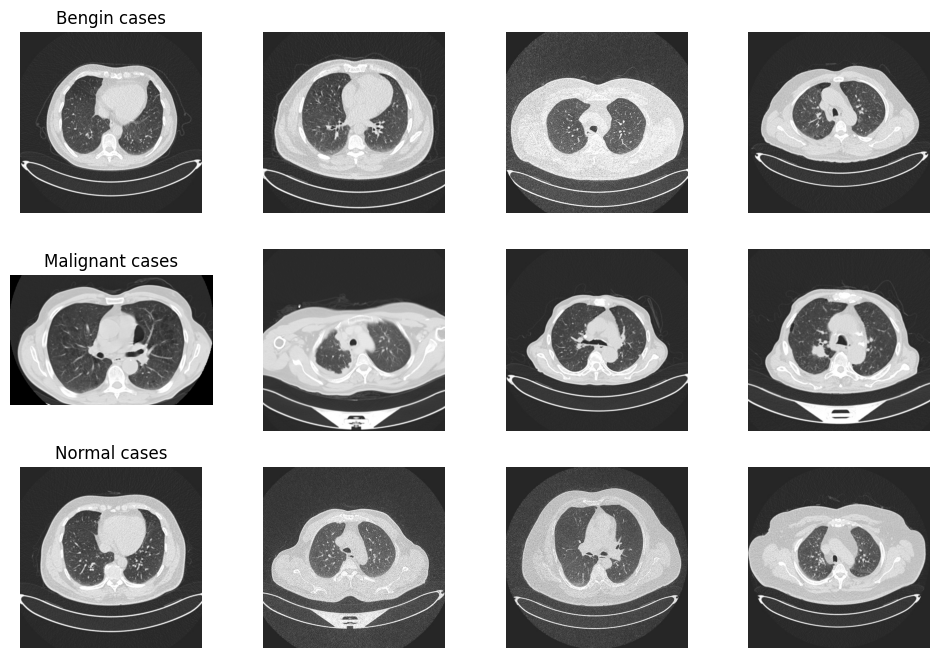

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))

for index, case in enumerate(cases):
    img_list = os.listdir(os.path.join(directory, case))
    for i in range(4):
        img = cv2.imread(os.path.join(directory, case, img_list[i]))
        ax[index, i].imshow(img)
        ax[index, i].axis('off')
        if i == 0:
            ax[index, i].set_title(case)

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D

In [ ]:
img_width, img_height = 224, 224
batch_size = 50

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)

In [ ]:
training_data = datagen.flow_from_directory(directory, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical', subset='training', shuffle=True, classes=['Bengin cases', 'Malignant cases', 'Normal cases'])
testing_data = datagen.flow_from_directory(directory, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical', subset='validation', shuffle=True, classes=['Bengin cases', 'Malignant cases', 'Normal cases'])

Found 878 images belonging to 3 classes.
Found 219 images belonging to 3 classes.


In [ ]:
base_model = tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
    classes=3
)
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 3)                 301059    
                                                                 
Total params: 23,888,771
Trainable params: 23,835,651
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(training_data, epochs=5, validation_data=testing_data)

Epoch 1/5
18/18 [==============================] - 95s 2s/step - loss: 2.6982 - accuracy: 0.7677 - val_loss: 55764560.0000 - val_accuracy: 0.5114
Epoch 2/5
18/18 [==============================] - 28s 1s/step - loss: 0.3224 - accuracy: 0.8667 - val_loss: 25243.2266 - val_accuracy: 0.5114
Epoch 3/5
18/18 [==============================] - 33s 2s/step - loss: 0.2475 - accuracy: 0.8895 - val_loss: 316.0794 - val_accuracy: 0.5114
Epoch 4/5
18/18 [==============================] - 26s 1s/step - loss: 0.3863 - accuracy: 0.8736 - val_loss: 34671556.0000 - val_accuracy: 0.5114
Epoch 5/5
18/18 [==============================] - 25s 1s/step - loss: 0.2811 - accuracy: 0.8907 - val_loss: 98525.3438 - val_accuracy: 0.5114


1/1 [==============================] - 2s 2s/step
Malignant
1/1 [==============================] - 0s 28ms/step
Malignant
1/1 [==============================] - 0s 30ms/step
Malignant


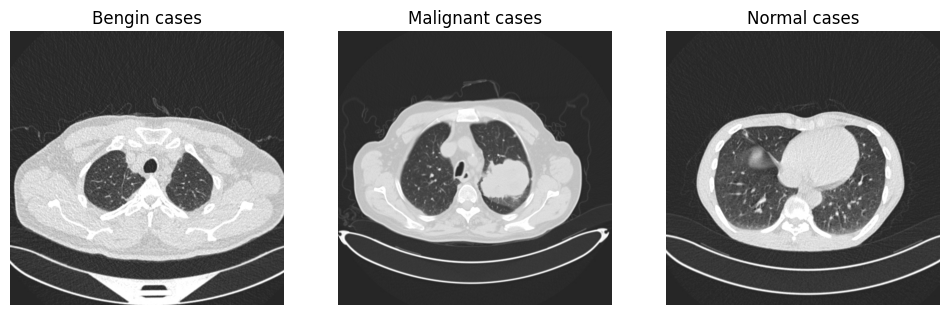

In [ ]:
from tensorflow.keras.preprocessing import image

prediction_img = ['/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (117).jpg',
                   '/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (387).jpg',
                  '/content/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (327).jpg']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

for i in range(3):
    img = cv2.imread(prediction_img[i])
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title(cases[i])


for i in prediction_img:
    img = image.load_img(i, target_size=(img_width, img_height))
    img_arr = image.img_to_array(img)
    img_arr= np.expand_dims(img_arr, axis=0)
    img_arr= img_arr/255
    predictions = model.predict(img_arr)
    predicted_class = np.argmax(predictions)
    if predicted_class == 0:
        print('Benign')
    elif predicted_class == 1:
        print('Malignant')
    else:
        print('Normal')

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
model2 = Sequential()
model2.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model2.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model2.add(Flatten())
model2.add(Dense(units=4096,activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(units=4096,activation="relu"))
model2.add(Dense(units=3, activation="softmax"))

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
model2.fit(training_data, epochs=5, validation_data=testing_data)

Epoch 1/5
18/18 [==============================] - 67s 2s/step - loss: 1.1525 - accuracy: 0.4146 - val_loss: 0.9670 - val_accuracy: 0.3790
Epoch 2/5
18/18 [==============================] - 31s 2s/step - loss: 0.9670 - accuracy: 0.4932 - val_loss: 0.9570 - val_accuracy: 0.5114
Epoch 3/5
18/18 [==============================] - 32s 2s/step - loss: 0.9601 - accuracy: 0.5125 - val_loss: 0.9635 - val_accuracy: 0.5114
Epoch 4/5
18/18 [==============================] - 26s 1s/step - loss: 0.9649 - accuracy: 0.5091 - val_loss: 0.9541 - val_accuracy: 0.5114
Epoch 5/5
18/18 [==============================] - 26s 1s/step - loss: 0.9575 - accuracy: 0.5114 - val_loss: 0.9565 - val_accuracy: 0.5114
